In [24]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import re

In [25]:
df = pd.read_excel(r'C:\Users\AReda\Desktop\Vois\text-class\data\Worksheet in Ticket Classification Task.xlsm')
df.head()

,Document,Topic_group
0,connection with icon icon dear please setup ic...,Hardware
1,work experience user work experience user hi w...,Access
2,requesting for meeting requesting meeting hi p...,Hardware
3,reset passwords for external accounts re expir...,Access
4,mail verification warning hi has got attached ...,Miscellaneous


In [26]:
df['Topic_group'].value_counts()

Topic_group
Hardware                 13617
HR Support               10915
Access                    7125
Miscellaneous             7060
Storage                   2777
Purchase                  2464
Internal Project          2119
Administrative rights     1760
Name: count, dtype: int64

In [27]:
print("Data shape:", df.shape)

Data shape: (47837, 2)


In [28]:
duplicates = df[df.duplicated(subset=["Document"], keep=False)]
print("Duplicates:\n", duplicates)

Duplicates:
 Empty DataFrame
Columns: [Document, Topic_group]
Index: []


In [29]:
df = df.drop_duplicates(subset=["Document"], keep="first").reset_index(drop=True)

print("After dropping duplicates:\n", df)

After dropping duplicates:
                                                 Document    Topic_group
0      connection with icon icon dear please setup ic...       Hardware
1      work experience user work experience user hi w...         Access
2      requesting for meeting requesting meeting hi p...       Hardware
3      reset passwords for external accounts re expir...         Access
4      mail verification warning hi has got attached ...  Miscellaneous
...                                                  ...            ...
47832  git space for a project issues with adding use...         Access
47833  error sent july error hi guys can you help out...  Miscellaneous
47834  connection issues sent tuesday july connection...       Hardware
47835  error cube reports sent tuesday july error hel...     HR Support
47836  running out on extensions hello please be advi...       Hardware

[47837 rows x 2 columns]


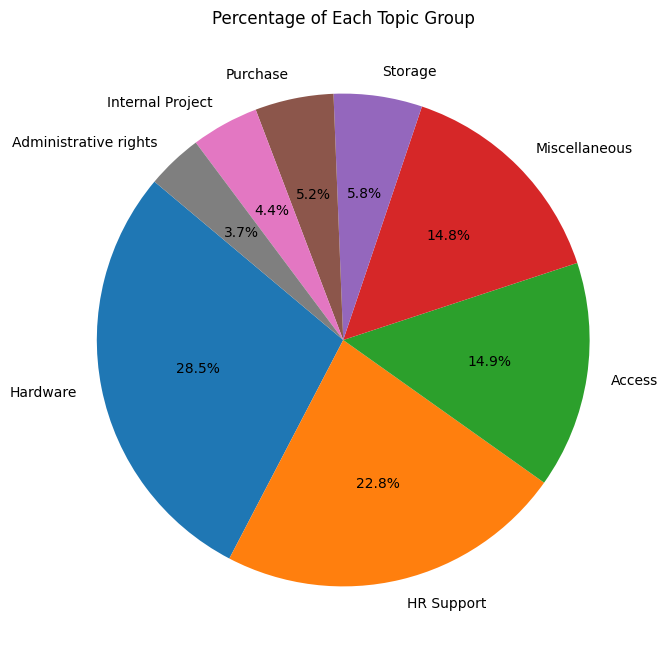

In [22]:
topic_counts = df['Topic_group'].value_counts(normalize=True) * 100

# Plot
plt.figure(figsize=(8,8))
topic_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.ylabel('')
plt.title("Percentage of Each Topic Group")
plt.show()

In [23]:
# as a list
unique_classes = df['Topic_group'].unique().tolist()

print(unique_classes)

['Hardware', 'Access', 'Miscellaneous', 'HR Support', 'Purchase', 'Administrative rights', 'Storage', 'Internal Project']


In [18]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AReda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

In [20]:
# Apply preprocessing to the Document column
df['Document'] = df['Document'].apply(preprocess_text)

In [ ]:
df.to_excel(r'C:\Users\AReda\Desktop\Vois\text-class\data\Worksheet_in_Ticket_Classification_Task_cleaned.xlsm', index=False)
